In [ ]:
cd /content/drive/MyDrive/amirhoseinbaghery/gen/gen

/content/drive/MyDrive/amirhoseinbaghery/gen/gen


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/data.zip'

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/image/
  inflating: data/image/fig_1.png    
  inflating: data/image/fig_10 (2).png  
  inflating: data/image/fig_10.png   
  inflating: data/image/fig_100 (2).png  
  inflating: data/image/fig_100.png  
  inflating: data/image/fig_101 (2).png  
  inflating: data/image/fig_101.png  
  inflating: data/image/fig_102 (2).png  
  inflating: data/image/fig_102.png  
  inflating: data/image/fig_103 (2).png  
  inflating: data/image/fig_103.png  
  inflating: data/image/fig_104 (2).png  
  inflating: data/image/fig_104.png  
  inflating: data/image/fig_105 (2).png  
  inflating: data/image/fig_105.png  
  inflating: data/image/fig_106 (2).png  
  inflating: data/image/fig_106.png  
  inflating: data/image/fig_107 (2).png  
  inflating: data/image/fig_107.png  
  inflating: data/image/fig_108 (2).png  
  inflating: data/image/fig_108.png  
  inflating: data/image/fig_109 (2).png  
  inflating: data/image/fig_109.png

In [96]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

In [ ]:
all_image_path = []
all_image_nice_path = []
full_image_train_path = "data/image/"
full_image_nice_path = "data/noisyImage/"

for path in os.listdir(full_image_train_path):
  if '.png' in path:
    all_image_path.append(os.path.join(full_image_train_path, path))

for path in os.listdir(full_image_nice_path):
  if '.png' in path:
    all_image_nice_path.append(os.path.join(full_image_nice_path, path))

image_path_1k = all_image_path
image_path_1k_nc = all_image_nice_path

print(len(image_path_1k),"/",len(all_image_path))
print(len(image_path_1k_nc),"/",len(all_image_nice_path))

1000 / 1000
1000 / 1000


In [ ]:
cropping_box = (115, 55, 791, 570)
# image_path_1k = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k]
image_path_1k = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k]
# image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k_nc]
image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k_nc]

array([[[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [245, 245, 241],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [246, 246, 242],
        [227, 227, 228],
        [211, 211, 211]],

       [[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [236, 236, 233],
        [220, 220, 221],
        [201, 201, 201]],

       ...,

       [[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [242, 241, 245],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [242, 241, 245],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 61,  38, 168],
        [ 61,  38, 168],
        [ 61,  38, 168],
        ...,
        [242, 241, 244],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
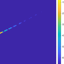

In [ ]:
image_path_1k[0]

array([[[ 25, 179, 200],
        [ 25, 165, 217],
        [ 23, 177, 205],
        ...,
        [ 22, 174, 207],
        [ 27, 172, 207],
        [ 25, 176, 199]],

       [[ 25, 166, 208],
        [ 29, 172, 203],
        [ 22, 177, 204],
        ...,
        [ 18, 179, 199],
        [ 30, 166, 204],
        [ 28, 170, 210]],

       [[ 31, 171, 206],
        [ 22, 182, 194],
        [ 26, 178, 199],
        ...,
        [ 20, 179, 200],
        [ 28, 167, 210],
        [ 30, 178, 199]],

       ...,

       [[ 21, 179, 196],
        [ 19, 174, 208],
        [ 24, 178, 205],
        ...,
        [ 30, 172, 204],
        [ 31, 169, 210],
        [ 36, 164, 210]],

       [[ 30, 177, 193],
        [ 17, 180, 204],
        [ 30, 169, 212],
        ...,
        [ 30, 168, 204],
        [ 24, 176, 201],
        [ 30, 175, 206]],

       [[ 21, 176, 202],
        [ 30, 178, 197],
        [ 30, 181, 194],
        ...,
        [ 29, 171, 209],
        [ 31, 162, 208],
        [ 33, 155, 214]]], dtype=uint8)
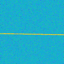

In [ ]:
image_path_1k_nc[0]

<Figure size 2000x1000 with 0 Axes>

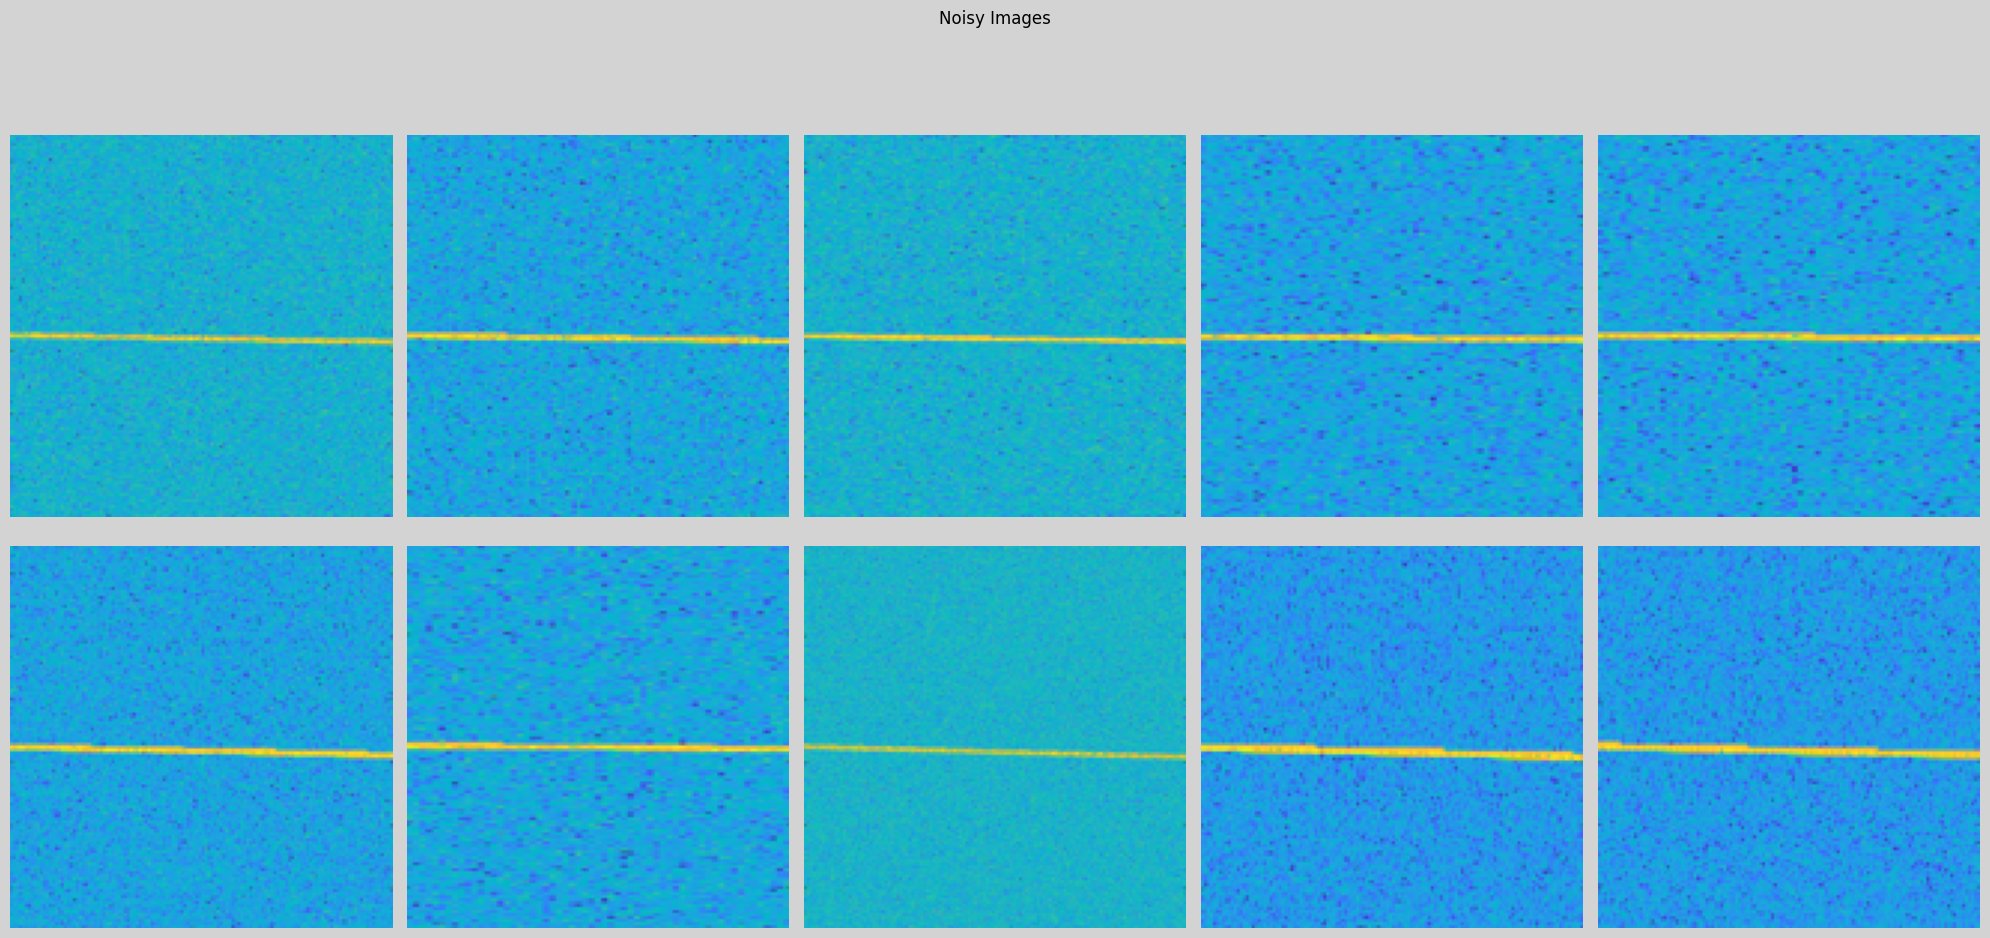

In [ ]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Noisy Images")
idx = 0
fig.patch.set_facecolor('lightgrey')
for i in range(2):
    for j in range(5):
        if idx < len(image_path_1k_nc):
            ax[i, j].imshow(image_path_1k_nc[idx])
            ax[i, j].axis('off')  # Hide the axes
            idx += 1

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<Figure size 2000x1000 with 0 Axes>

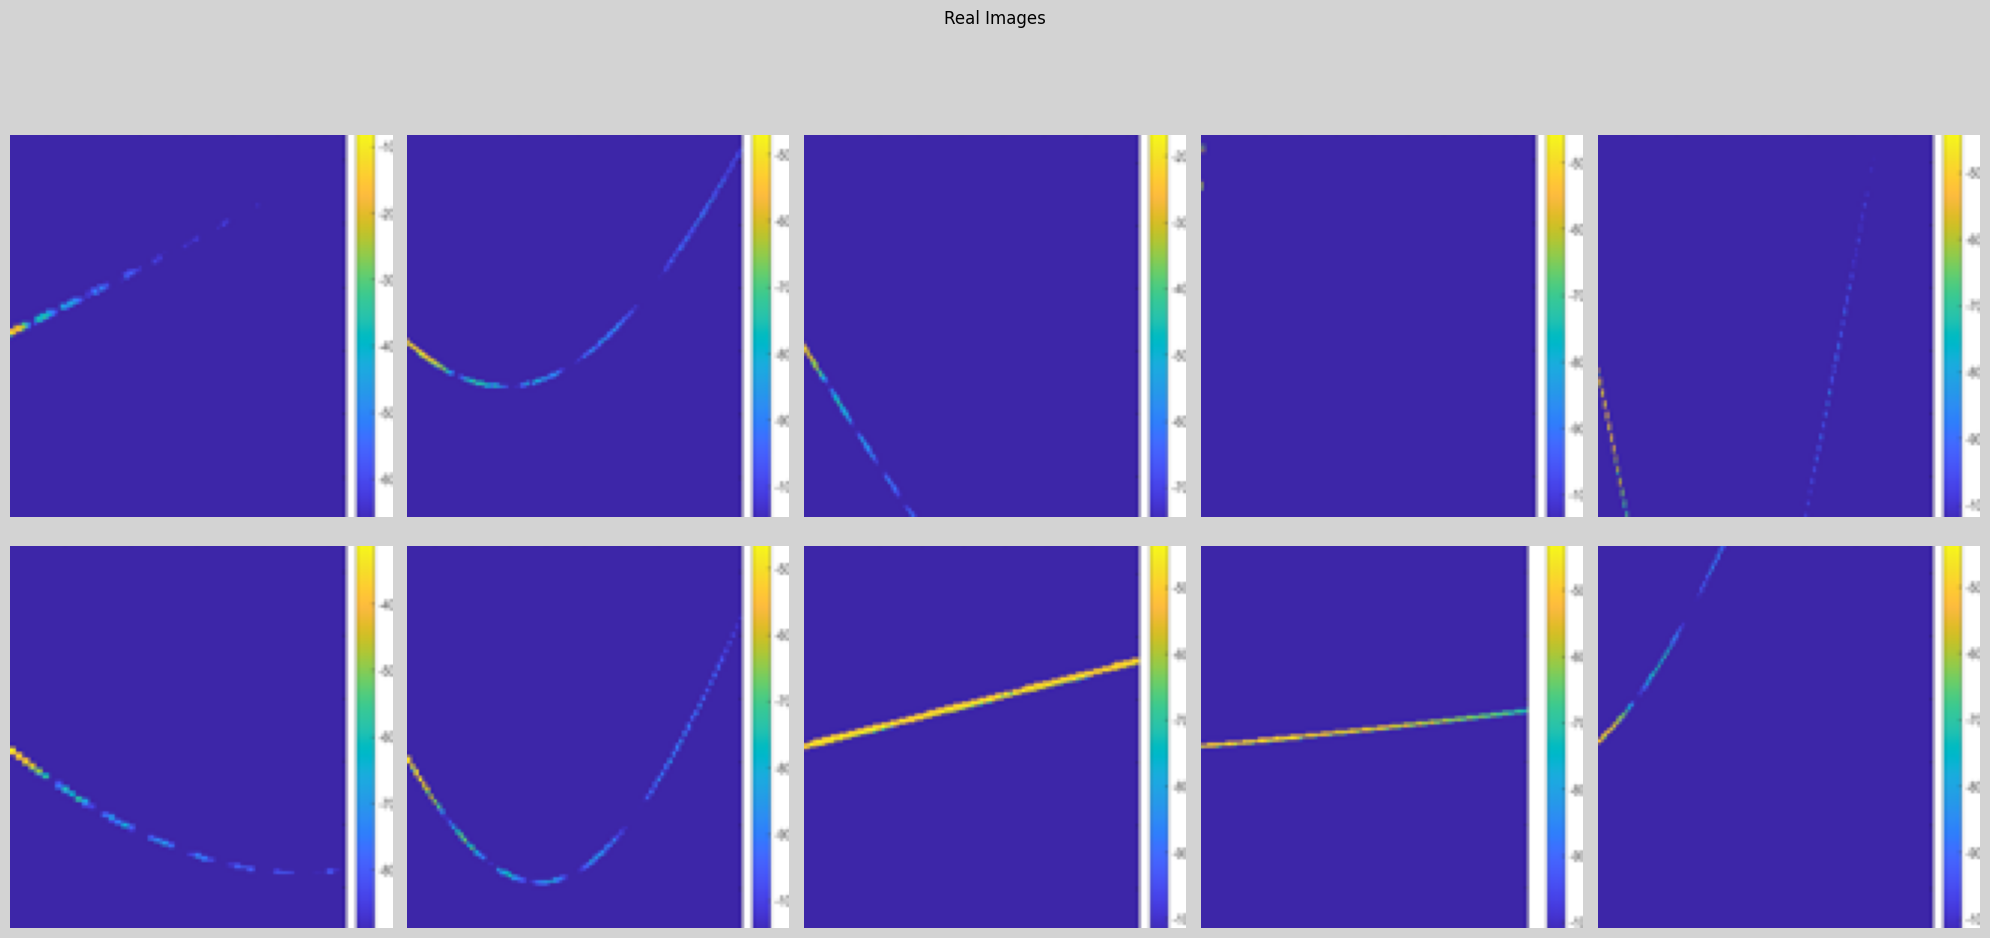

In [ ]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Real Images")
idx = 0
fig.patch.set_facecolor('lightgrey')
for i in range(2):
    for j in range(5):
        if idx < len(image_path_1k):
            ax[i, j].imshow(image_path_1k[idx])
            ax[i, j].axis('off')  # Hide the axes
            idx += 1

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
X_train_noise = np.array(image_path_1k_nc) / 255.0
X_test_noise = np.array(image_path_1k_nc) / 255.0

X_train = np.array(image_path_1k) / 255.0
X_test = np.array(image_path_1k) / 255.0

In [ ]:
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
# X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 64,64,3)
# X_test_noise = X_test.reshape(X_test_noise.shape[0], 64,64,3)

X_train = X_train.reshape(X_train.shape[0], 64 ,64, 3)
X_test = X_test.reshape(X_test.shape[0], 64,64,3)

print(X_train_noise.shape,X_train.shape)

(1000, 64, 64, 3) (1000, 64, 64, 3)


In [97]:
# encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

In [98]:
# decoder
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(3, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [99]:
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1193 (Conv2D)        (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_1194 (Conv2D)        (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)    

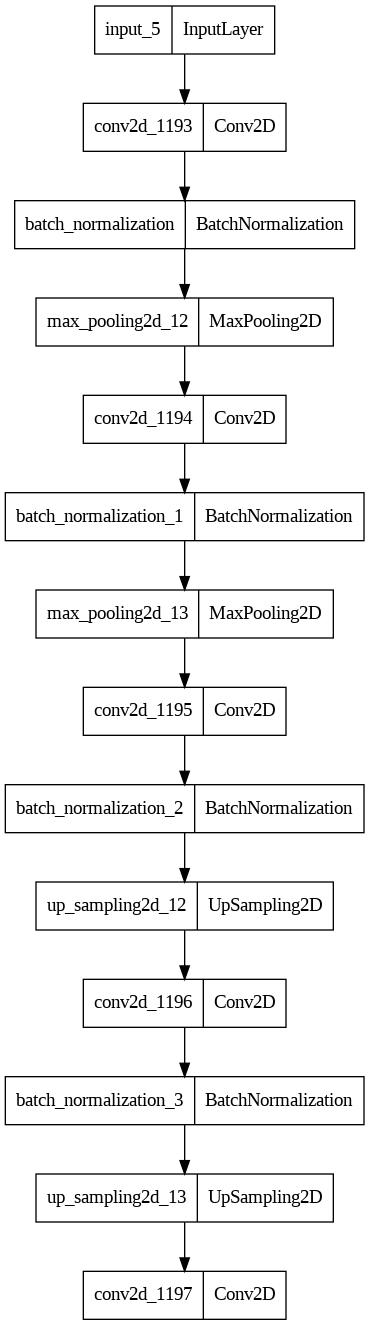

In [100]:
import keras
keras.utils.plot_model(autoencoder,to_file="model.png")

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
checkpoint = ModelCheckpoint("denoising_model.h5", save_best_only=True, save_weights_only=False, verbose = 1)
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 50, callbacks = checkpoint, validation_split = 0.25, verbose = 2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.68321, saving model to denoising_model.h5
6/6 - 7s - loss: 0.7312 - val_loss: 0.6832 - 7s/epoch - 1s/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.68321 to 0.66674, saving model to denoising_model.h5
6/6 - 1s - loss: 0.6227 - val_loss: 0.6667 - 1s/epoch - 198ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.66674 to 0.64761, saving model to denoising_model.h5
6/6 - 1s - loss: 0.5963 - val_loss: 0.6476 - 1s/epoch - 201ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.64761 to 0.63203, saving model to denoising_model.h5
6/6 - 1s - loss: 0.5853 - val_loss: 0.6320 - 1s/epoch - 202ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.63203 to 0.62168, saving model to denoising_model.h5
6/6 - 1s - loss: 0.5797 - val_loss: 0.6217 - 1s/epoch - 199ms/step
Epoch 6/50

Epoch 6: val_loss improved from 0.62168 to 0.61364, saving model to denoising_model.h5
6/6 - 1s - loss: 0.5759 - val_loss: 0.6136 - 1s/epoch - 198ms/step
Epoch 7/50

Epoch 7: val_loss improved from 0.61364 to 0.60822, saving model to denoising_model.h5
6/6 - 1s - loss: 0.5721 - val_loss: 0.6082 - 1s/epoch - 202ms/step
Epoch 8/50

Epo

In [ ]:
pred = autoencoder.predict(X_test_noise[:20])
pred.shape

1/1 [==============================] - 1s 774ms/step


(20, 128, 128, 3)

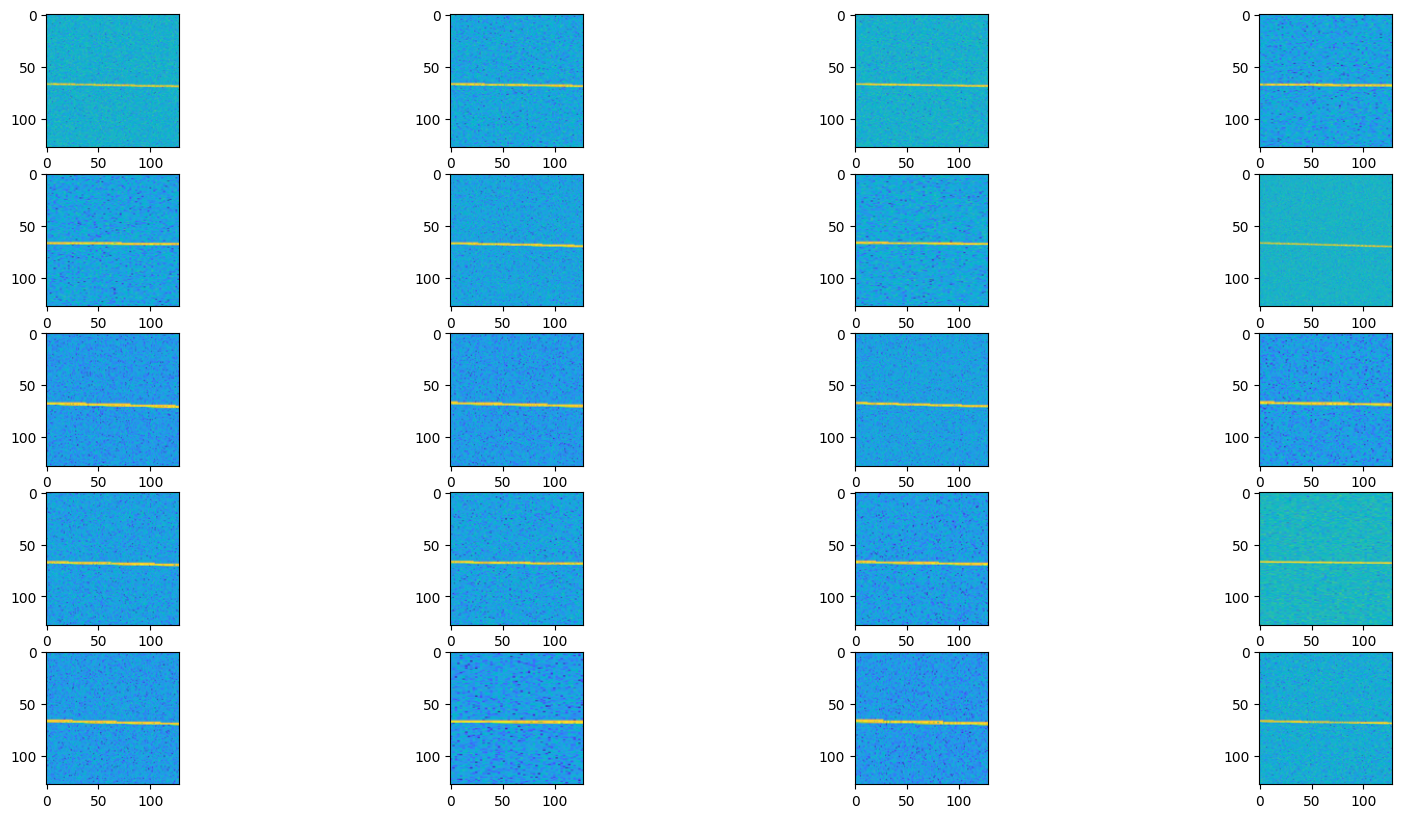

In [ ]:
count = 0
fig, axes = plt.subplots(5, 4, figsize = (20,10))
for i in range(5):
    for j in range(4):
        axes[i,j].imshow(X_test_noise[count])
        count+=1

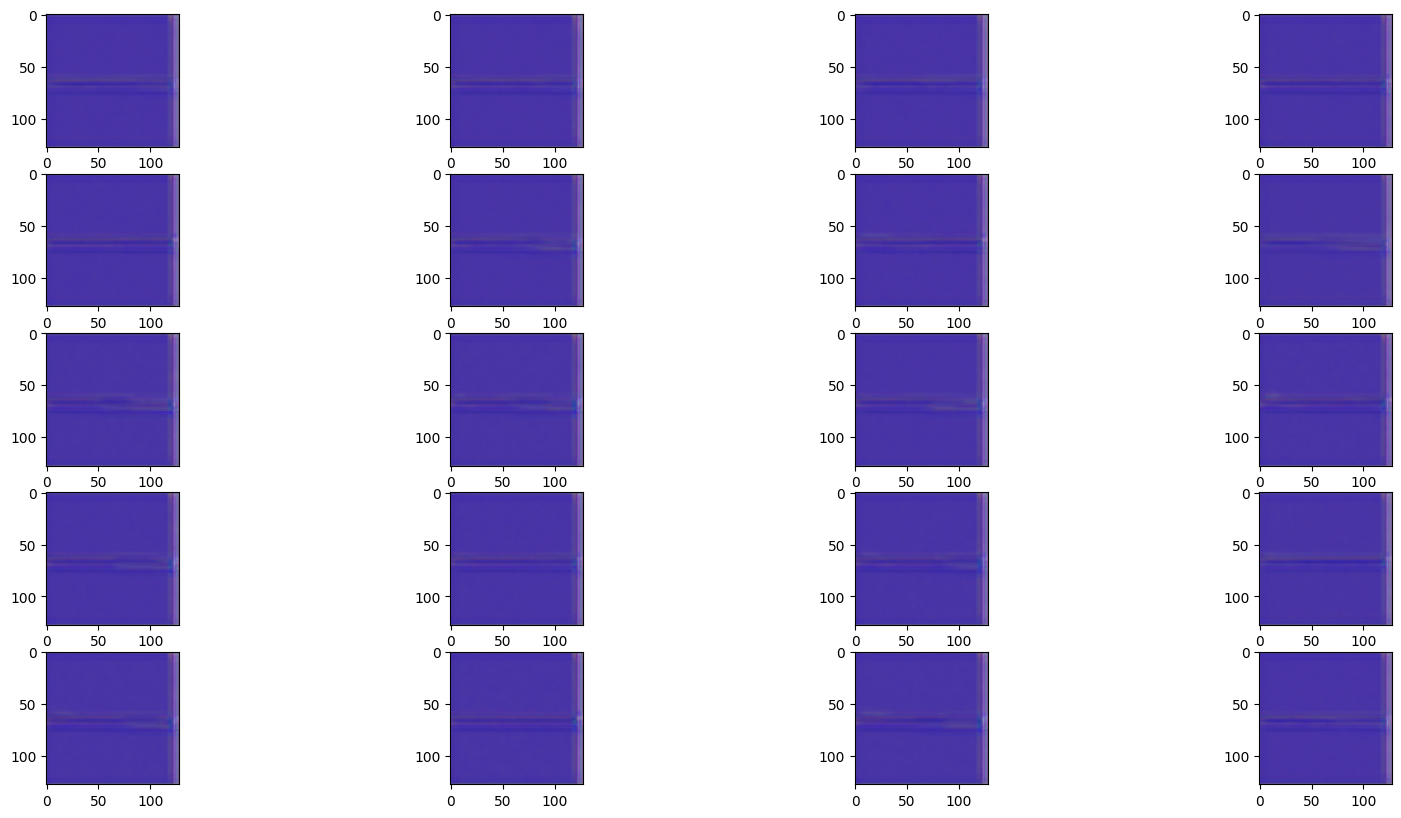

In [ ]:
count = 0
fig, axes = plt.subplots(5, 4, figsize = (20,10))
for i in range(5):
    for j in range(4):
        axes[i,j].imshow(pred[count])
        count+=1

UNET

In [ ]:
import os
import numpy as np
from PIL import Image
all_image_path = []
all_image_nice_path = []
full_image_train_path = "data/image/"
full_image_nice_path = "data/noisyImage/"

for path in os.listdir(full_image_train_path):
  if '.png' in path:
    all_image_path.append(os.path.join(full_image_train_path, path))

for path in os.listdir(full_image_nice_path):
  if '.png' in path:
    all_image_nice_path.append(os.path.join(full_image_nice_path, path))

image_path_1k = all_image_path
image_path_1k_nc = all_image_nice_path

print(len(image_path_1k),"/",len(all_image_path))
print(len(image_path_1k_nc),"/",len(all_image_nice_path))

cropping_box = (115, 55, 791, 570)
# image_path_1k = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k]
image_path_1k = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k]
# image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k_nc]
image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k_nc]

X_train_noise = np.array(image_path_1k_nc) / 255.0
X_test_noise = np.array(image_path_1k_nc) / 255.0

X_train = np.array(image_path_1k) / 255.0
X_test = np.array(image_path_1k) / 255.0

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
# X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 64,64,3)
# X_test_noise = X_test.reshape(X_test_noise.shape[0], 64,64,3)

X_train = X_train.reshape(X_train.shape[0], 64 ,64, 3)
X_test = X_test.reshape(X_test.shape[0], 64,64,3)

print(X_train_noise.shape,X_train.shape)

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D,UpSampling2D, concatenate
from tensorflow.keras.models import Model

# U-Net model definition
def unet_model(input_size=(64, 64, 3)):
    inputs = Input(input_size)

    # Encoding path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoding path
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(3, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs, conv10)
    return model

In [61]:
# Compile and train the model
img_height = 64
img_width = 64
input_shape = (img_height, img_width, 3)
model = unet_model(input_shape)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_956 (Conv2D)         (None, 64, 64, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_957 (Conv2D)         (None, 64, 64, 64)           36928     ['conv2d_956[0][0]']          
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)           0         ['conv2d_957[0][0]']          
 D)                                                                                           

In [73]:
# Train the model
# Assuming you have already defined your U-Net model (unet_model)

# Compile the model (specify optimizer, loss function, metrics)
model = unet_model(input_size=(64, 64, 3))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_noise, X_train, epochs=20, batch_size=32, validation_data=(X_test_noise, X_test))

Epoch 1/20
32/32 [==============================] - 17s 254ms/step - loss: 0.0570 - mae: 0.1997 - val_loss: 0.0219 - val_mae: 0.0726
Epoch 2/20
32/32 [==============================] - 7s 231ms/step - loss: 0.0208 - mae: 0.0639 - val_loss: 0.0198 - val_mae: 0.0563
Epoch 3/20
32/32 [==============================] - 7s 233ms/step - loss: 0.0194 - mae: 0.0545 - val_loss: 0.0189 - val_mae: 0.0528
Epoch 4/20
32/32 [==============================] - 6s 195ms/step - loss: 0.0185 - mae: 0.0512 - val_loss: 0.0180 - val_mae: 0.0555
Epoch 5/20
32/32 [==============================] - 8s 239ms/step - loss: 0.0163 - mae: 0.0465 - val_loss: 0.0154 - val_mae: 0.0424
Epoch 6/20
32/32 [==============================] - 7s 236ms/step - loss: 0.0149 - mae: 0.0423 - val_loss: 0.0144 - val_mae: 0.0406
Epoch 7/20
32/32 [==============================] - 7s 236ms/step - loss: 0.0140 - mae: 0.0401 - val_loss: 0.0134 - val_mae: 0.0386
Epoch 8/20
32/32 [==============================] - 7s 233ms/step - loss: 0

1/1 [==============================] - 0s 343ms/step


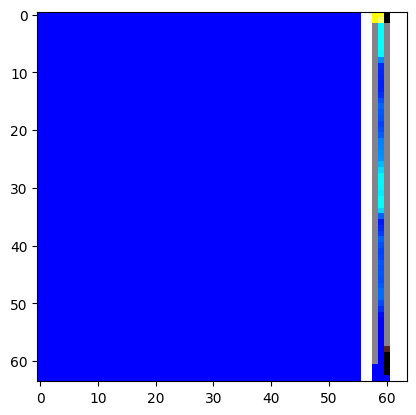

In [74]:
import matplotlib.pyplot as plt
denoised_image = model.predict(np.expand_dims(image_path_1k_nc[0], axis=0))
pil_img = tf.keras.preprocessing.image.array_to_img(denoised_image.squeeze())
plt.imshow(pil_img)

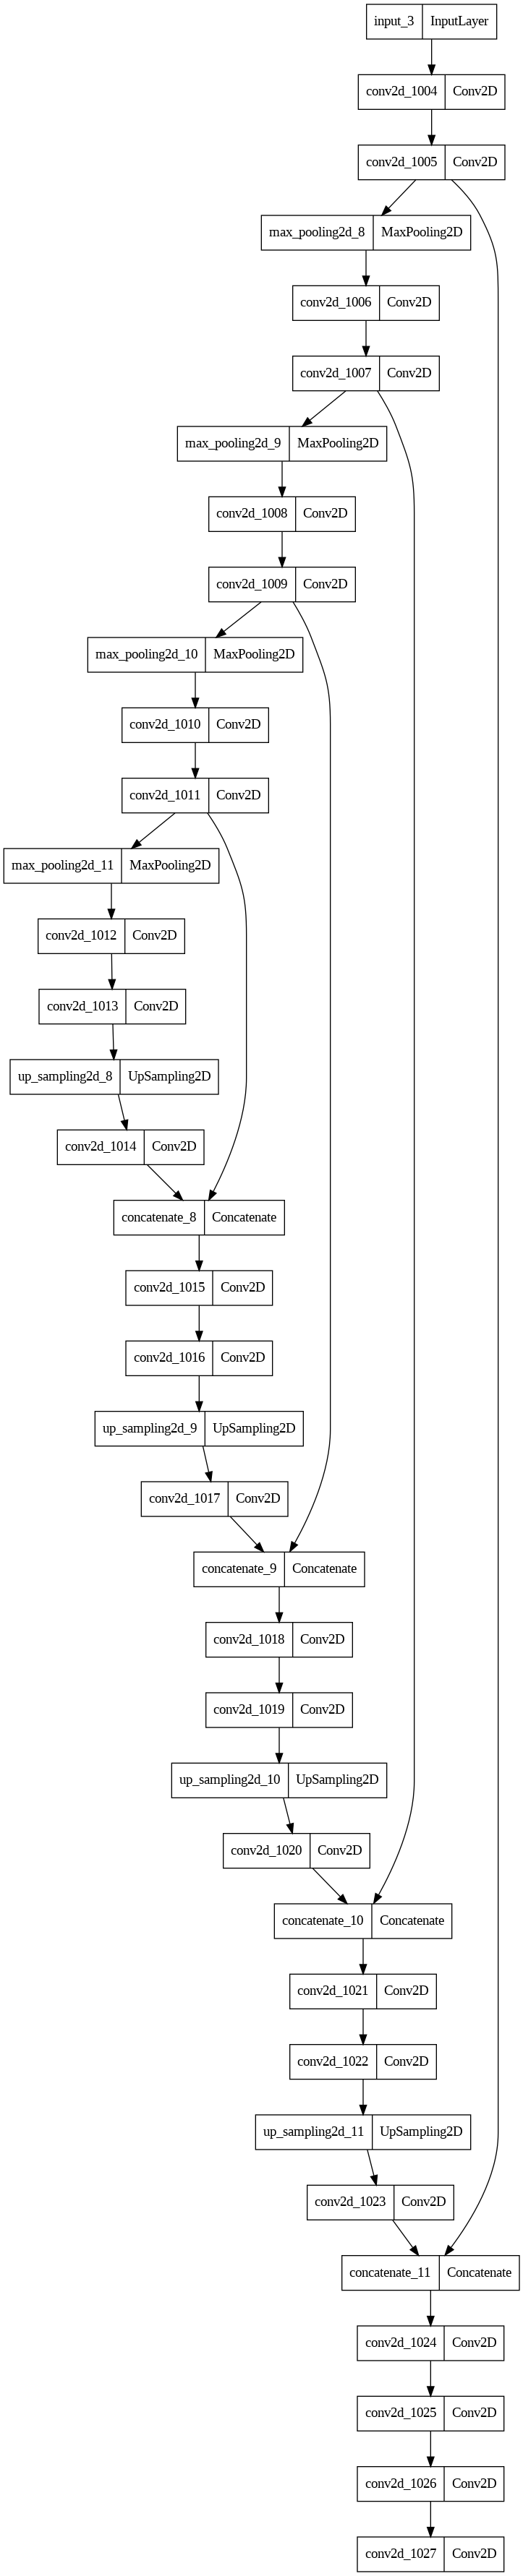

In [90]:
import keras
keras.utils.plot_model(model,to_file="model.png")

CycleGAN

In [6]:
import os
import numpy as np
from PIL import Image
all_image_path = []
all_image_nice_path = []
full_image_train_path = "data/image/"
full_image_nice_path = "data/noisyImage/"

for path in os.listdir(full_image_train_path):
  if '.png' in path:
    all_image_path.append(os.path.join(full_image_train_path, path))

for path in os.listdir(full_image_nice_path):
  if '.png' in path:
    all_image_nice_path.append(os.path.join(full_image_nice_path, path))

image_path_1k = all_image_path
image_path_1k_nc = all_image_nice_path

print(len(image_path_1k),"/",len(all_image_path))
print(len(image_path_1k_nc),"/",len(all_image_nice_path))

cropping_box = (115, 55, 791, 570)
# image_path_1k = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k]
image_path_1k = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k]
# image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box))) for path in image_path_1k_nc]
image_path_1k_nc = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_1k_nc]

X_train_noise = np.array(image_path_1k_nc) / 255.0
X_test_noise = np.array(image_path_1k_nc) / 255.0

X_train = np.array(image_path_1k) / 255.0
X_test = np.array(image_path_1k) / 255.0

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
# X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 64 ,64, 3)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 64,64,3)
# X_test_noise = X_test.reshape(X_test_noise.shape[0], 64,64,3)

X_train = X_train.reshape(X_train.shape[0], 64 ,64, 3)
X_test = X_test.reshape(X_test.shape[0], 64,64,3)

print(X_train_noise.shape,X_train.shape)

1000 / 1000
1000 / 1000
(1000, 64, 64, 3) (1000, 64, 64, 3)


In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

def build_generator(image_shape):
  """
  Builds the generator network for CycleGAN.

  Args:
      image_shape: A tuple representing the shape of the input image (height, width, channels).

  Returns:
      A Keras model representing the generator network.
  """
  model = Sequential()

  # Encoder (Down-sampling)
  model.add(Conv2D(32, (7, 7), strides=(1, 1), padding='same', activation='relu', input_shape=image_shape))
  model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  # Residual blocks
  for _ in range(9):
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))

  # Decoder (Up-sampling)
  model.add(Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  model.add(Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  model.add(Conv2D(3, (7, 7), strides=(1, 1), padding='same', activation='tanh'))

  return model

def build_discriminator(image_shape):
  """
  Builds the discriminator network for CycleGAN.

  Args:
      image_shape: A tuple representing the shape of the input image (height, width, channels).

  Returns:
      A Keras model representing the discriminator network.
  """
  model = Sequential()
  model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='LeakyReLU', input_shape=image_shape))
  model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='LeakyReLU'))
  model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='LeakyReLU'))
  model.add(Conv2D(512, (3, 3), strides=(2, 2), padding='same', activation='LeakyReLU'))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  return model

# Define image shape
image_shape = X_train.shape[1:]

# Build generator and discriminator models
generator_A2B = build_generator(image_shape)
generator_B2A = build_generator(image_shape)
discriminator_A = build_discriminator(image_shape)
discriminator_B = build_discriminator(image_shape)

# Define optimizer
optimizer = Adam(0.0002, 0.5)

# Get all trainable variables
all_trainable_variables = generator_A2B.trainable_variables + generator_B2A.trainable_variables + discriminator_A.trainable_variables + discriminator_B.trainable_variables

# Build the optimizer with all trainable variables
optimizer.build(all_trainable_variables)

# Compile generator A
generator_A2B.compile(loss='binary_crossentropy', optimizer=optimizer)

# Compile discriminator A (freeze generator B weights)
discriminator_A.compile(loss='binary_crossentropy', optimizer=optimizer, loss_weights=[0.5])
discriminator_A.trainable = False
generator_B2A.trainable = False
combined_A = Sequential([generator_A2B, discriminator_A])
combined_A.compile(loss=['binary_crossentropy', 'binary_crossentropy'], loss_weights=[0.5, 0.5])
  # Compile similar model for training discriminator B and generator B
discriminator_B.compile(loss='binary_crossentropy', optimizer=optimizer, loss_weights=[0.5])
generator_B2A.compile(loss='binary_crossentropy', optimizer=optimizer)
combined_B = Sequential([generator_B2A, discriminator_B])
combined_B.compile(loss=['binary_crossentropy', 'binary_crossentropy'], loss_weights=[0.5, 0.5])

# Define training parameters
epochs = 5
batch_size = 32
lambda_cycle = 10.0  # Hyperparameter for cycle consistency loss


# Training loop
for epoch in range(epochs):
  # Train on batch of images
  for i in range(len(X_train) // batch_size):
    # Real images
    real_images_A = X_train[i * batch_size:(i + 1) * batch_size]
    real_images_B = X_train_noise[i * batch_size:(i + 1) * batch_size]

    # Generate fake images
    fake_images_B = generator_A2B.predict(real_images_A)
    fake_images_A = generator_B2A.predict(real_images_B)

    # Translate back and forth for cycle consistency
    recon_images_A = generator_B2A.predict(fake_images_B)
    recon_images_B = generator_A2B.predict(fake_images_A)

    # Train discriminator A on real and fake images
    discriminator_A_loss_real = discriminator_A.train_on_batch(real_images_A, np.ones((batch_size, 1)))
    discriminator_A_loss_fake = discriminator_A.train_on_batch(fake_images_A, np.zeros((batch_size, 1)))
    discriminator_A_loss = 0.5 * (discriminator_A_loss_real + discriminator_A_loss_fake)

    # Train discriminator B on real and fake images
    discriminator_B_loss_real = discriminator_B.train_on_batch(real_images_B, np.ones((batch_size, 1)))
    discriminator_B_loss_fake = discriminator_B.train_on_batch(fake_images_B, np.zeros((batch_size, 1)))
    discriminator_B_loss = 0.5 * (discriminator_B_loss_real + discriminator_B_loss_fake)

    # Train generator A
    generator_A_loss = combined_A.train_on_batch(real_images_A, [np.ones((batch_size, 1)), np.ones((batch_size, 1))])

    # Train generator B with cycle consistency loss
    generator_B_loss = combined_B.train_on_batch(real_images_B, [np.ones((batch_size, 1)), np.ones((batch_size, 1))])
    cycle_loss_A = np.mean(np.abs(recon_images_A - real_images_A)) * lambda_cycle
    cycle_loss_B = np.mean(np.abs(recon_images_B - real_images_B)) * lambda_cycle

    # Update generator B loss with cycle consistency losses
    # generator_B_loss = generator_B_loss + cycle_loss_A + cycle_loss_B

    # Print training progress
    print(f"Epoch: {epoch+1}/{epochs}, Batch: {i+1}, Generator A loss: {generator_A_loss:.4f}, Generator B loss: {generator_B_loss:.4f}, Discriminator A loss: {discriminator_A_loss:.4f}, Discriminator B loss: {discriminator_B_loss:.4f}")

# Save the trained models
generator_A2B.save("generator_A2B.h5")
generator_B2A.save("generator_B2A.h5")

1/1 [==============================] - 0s 19ms/step
Epoch: 1/5, Batch: 1, Generator A loss: 0.3462, Generator B loss: 0.3462, Discriminator A loss: 0.3465, Discriminator B loss: 0.3419
1/1 [==============================] - 0s 18ms/step
Epoch: 1/5, Batch: 2, Generator A loss: 0.3409, Generator B loss: 0.3019, Discriminator A loss: 0.2925, Discriminator B loss: 0.2832
1/1 [==============================] - 0s 18ms/step
Epoch: 1/5, Batch: 3, Generator A loss: 0.3016, Generator B loss: 0.1507, Discriminator A loss: 0.2300, Discriminator B loss: 0.4970
1/1 [==============================] - 0s 20ms/step
Epoch: 1/5, Batch: 4, Generator A loss: 0.1899, Generator B loss: 0.0118, Discriminator A loss: 0.1782, Discriminator B loss: 1.9245
1/1 [==============================] - 0s 26ms/step
Epoch: 1/5, Batch: 5, Generator A loss: 0.0701, Generator B loss: 0.0216, Discriminator A loss: 0.1636, Discriminator B loss: 1.7268
1/1 [==============================] - 0s 26ms/step
Epoch: 1/5, Batch: 6, G

In [85]:
from tensorflow.keras.models import load_model

g_model_AtoB = load_model('/content/generator_A2B.h5')
g_model_BtoA = load_model('/content/generator_B2A.h5')

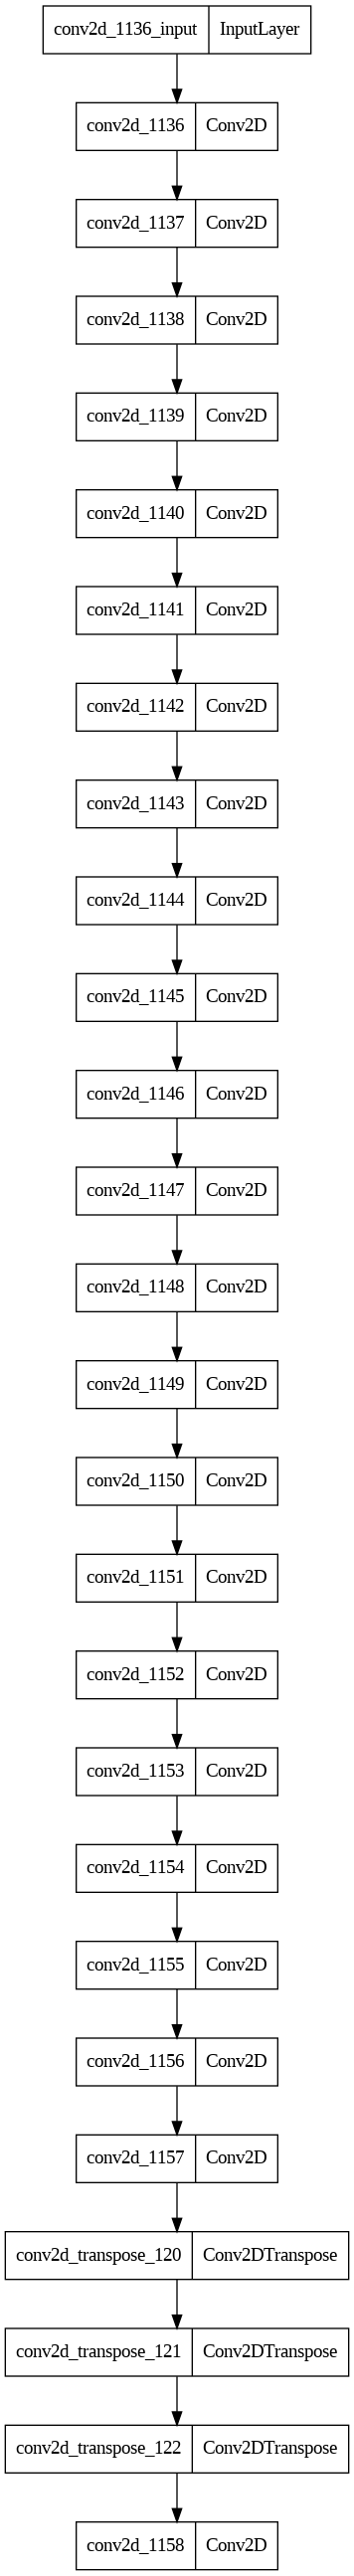

In [88]:
import keras
keras.utils.plot_model(g_model_AtoB,to_file="model.png")

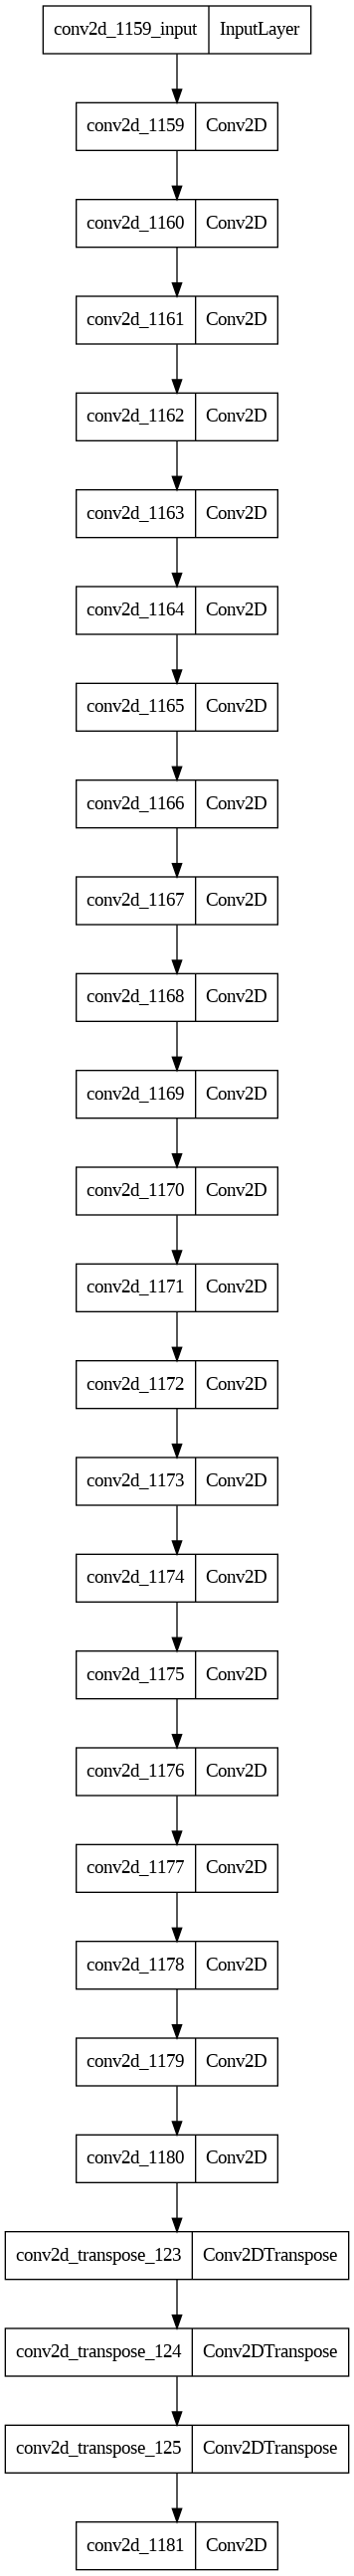

In [89]:
import keras
keras.utils.plot_model(g_model_BtoA,to_file="model.png")

1/1 [==============================] - 0s 358ms/step


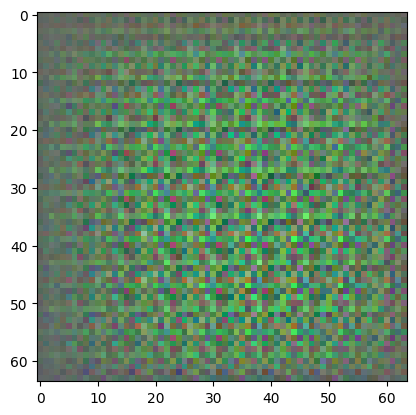

In [86]:
import matplotlib.pyplot as plt
denoised_image = g_model_BtoA.predict(np.expand_dims(image_path_1k[0], axis=0))
pil_img = tf.keras.preprocessing.image.array_to_img(denoised_image.squeeze())
plt.imshow(pil_img)

1/1 [==============================] - 0s 401ms/step


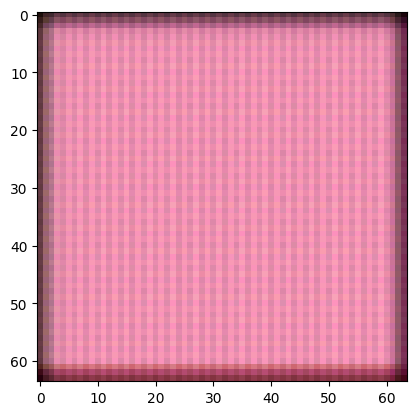

In [87]:
import matplotlib.pyplot as plt
denoised_image = g_model_AtoB.predict(np.expand_dims(image_path_1k_nc[0], axis=0))
pil_img = tf.keras.preprocessing.image.array_to_img(denoised_image.squeeze())
plt.imshow(pil_img)